Task 1.1 
SVD compression of BW image.

Optimal r:  154
Frobenius Norm Error: 4993.42265248728


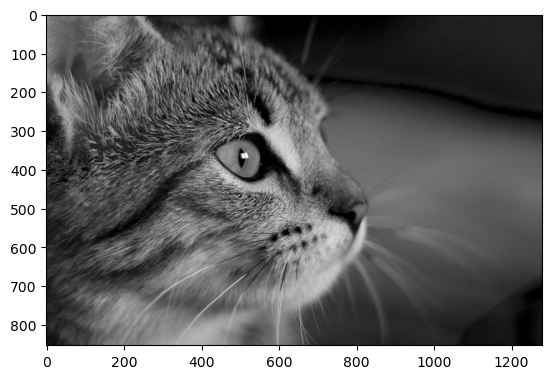

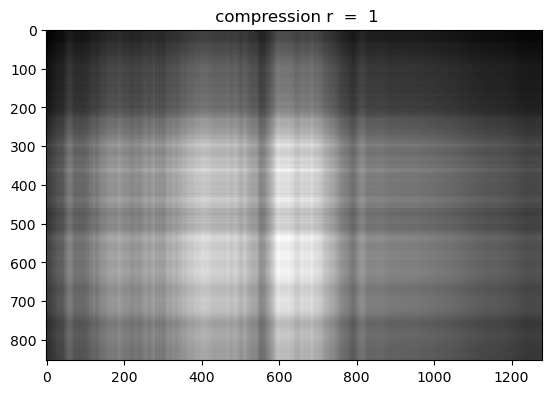

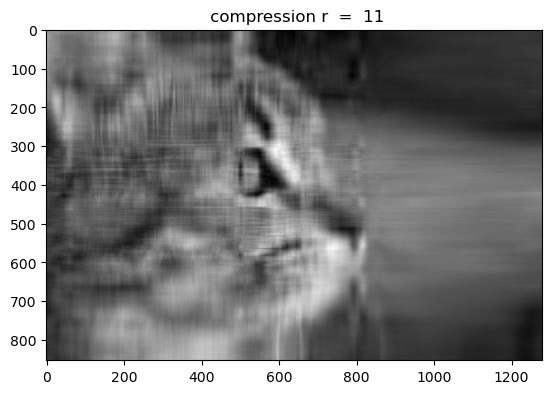

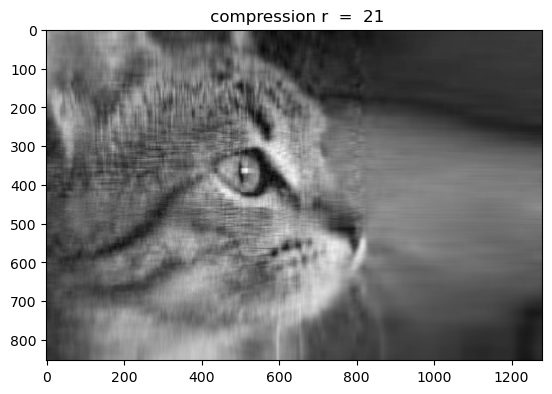

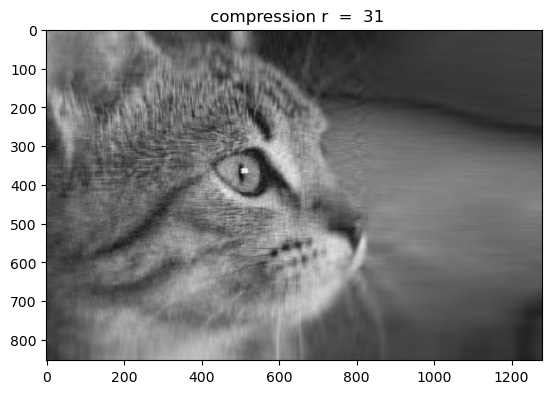

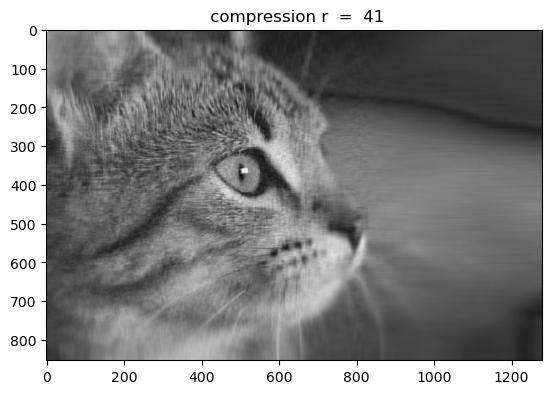

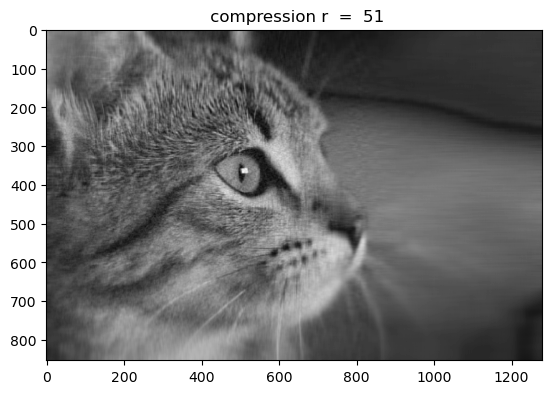

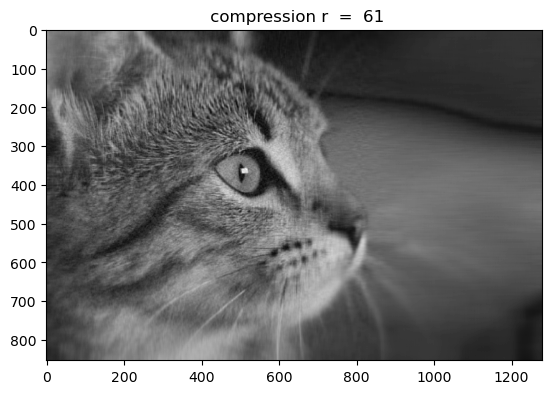

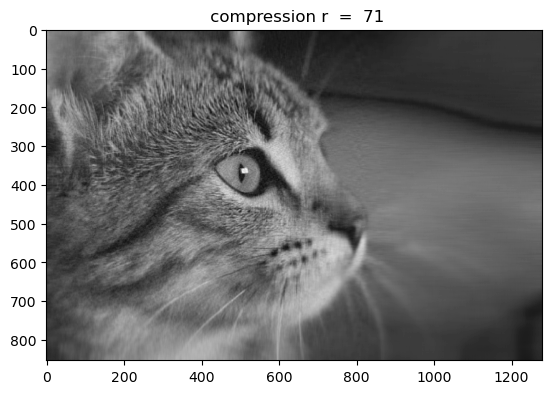

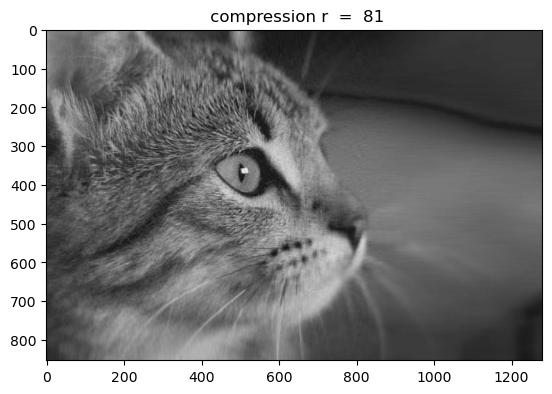

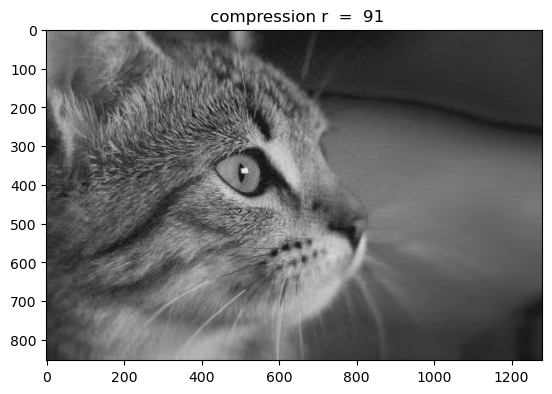

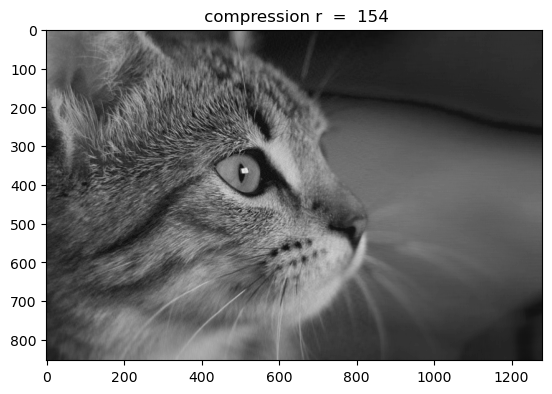

In [23]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

path = '/home/vbva/Pictures/image1.jpg'
img = Image.open(path)
plt.imshow(img)

imgmat = np.array( list(img.getdata(band = 0)), float)
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)
plt.figure()


r = 1
eps = 5000
err = 10000
U, S, Vt = np.linalg.svd(imgmat)

while eps < err:
    cmpimg = np.matrix(U[:, :r]) * np.diag(S[:r]) * np.matrix(Vt[:r,:])
    err = np.linalg.norm(imgmat - cmpimg, 'fro')
    r = r + 1


print("Optimal r: ", r)
print("Frobenius Norm Error:", err)


for i in range (1, 100, 10):
    cmpimg_t = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
    plt.imshow(cmpimg_t, cmap = 'gray')
    title = " compression r  =  %s" %i
    plt.title(title)
    plt.show()
    
plt.imshow(cmpimg, cmap = 'gray')
title = " compression r  =  %s" %r
plt.title(title)
plt.show()



Task 1.2 

In [14]:
import numpy as np
import time

n = 2048
r = 5

A = np.fromfunction(lambda i, j: np.sin(i + j) + 2, (n, n), dtype=float)
x = np.random.randint(1, 10, n)

start_time = time.time()
res1 = np.dot(A, x)
end_time = time.time()
print("Time without SVD: {:.4f} seconds".format(end_time - start_time))


U, S, Vt = np.linalg.svd(A, full_matrices=False)

start_time = time.time()
res2 = np.dot(U[:,:r], np.dot(np.diag(S[:r]), np.dot(Vt[:r,:], x)))    
end_time = time.time()
print("Time with SVD: {:.4f} seconds".format(end_time - start_time))








Time without SVD: 0.0038 seconds
Time with SVD: 0.0012 seconds


Task 1.3
Реализовать epsilon-округление матриц через SVD

In [24]:
import numpy as np

n = 5
m = 5
target_error = 0.05  

A = np.random.rand(n, m)
U, S, Vt = np.linalg.svd(A, full_matrices=False)

eps = 5000
err = 10000
while eps < err:
    A_cmp = np.matrix(U[:, :r]) * np.diag(S[:r]) * np.matrix(Vt[:r,:])
    err = np.linalg.norm(A - A_cmp, 'fro')
    r = r + 1


print("Optimal r: ", r)
print("Frobenius Norm Error:", err)


Optimal r:  155
Frobenius Norm Error: 1.9281418270474955e-15
